In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.discrete.discrete_model as sm

In [3]:
filename = "/Users/joeybuss/Motu/Football_Outsiders_INFO.csv"
fbdf = pd.read_csv(filename)


In [4]:
#rename the first column to show the year 
fbdf = fbdf.rename(columns = {"Unnamed: 0":"Year","2019":"Team","Run Blocking ":"Run Blocking"})

In [5]:
#We will run several different analysis, so we will go down each path starting from this point

In [6]:
#Some Exploratory Analysis 
#First show the balance of the target variable playoffs 
count0s = len(fbdf[fbdf["Playoffs"]==0])
print("Number of teams that did not make the playoffs: ", count0s)
count1s =  len(fbdf[fbdf["Playoffs"]==1])
print("Number of teams that made the playoffs: ", count1s)
propof0s = count0s/( count0s + count1s)
print("The proportion of teams that did not make the playoffs:", propof0s)
propof1s = 1- propof0s 
print("The proportion of teams that did not make the playoffs: ", propof1s)



Number of teams that did not make the playoffs:  40
Number of teams that made the playoffs:  24
The proportion of teams that did not make the playoffs: 0.625
The proportion of teams that did not make the playoffs:  0.375


In [7]:
#We will leave the sample unblananced for the meantime, later we will smote and the ROC curve 
#lets do some visualization 
fbdf.columns

Index(['Year', 'Team', 'Run Blocking', 'Pass Blocking', 'DEF Run Blocking',
       'DEF Pass Rushing', 'DVOAQ', 'DVOAR', 'Playoffs'],
      dtype='object')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'DVOAR')

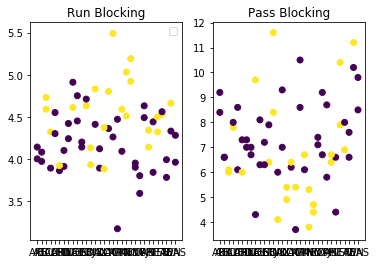

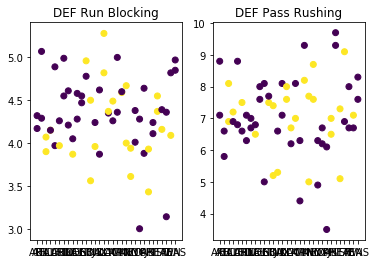

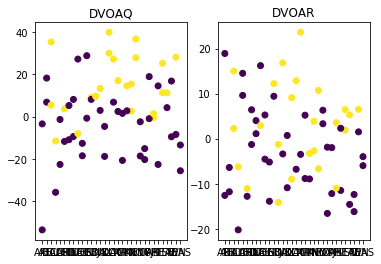

In [8]:
%matplotlib inline

fig1, (ax1,ax2) = plt.subplots(1,2,sharey=False)

ax1.scatter(x= fbdf["Team"], y = fbdf["Run Blocking"],c = fbdf["Playoffs"])
ax1.legend(loc = "upper right")
ax2.scatter(x= fbdf["Team"], y = fbdf["Pass Blocking"],c = fbdf["Playoffs"])
ax1.set_title("Run Blocking")
ax2.set_title("Pass Blocking")

fig2, (ax3,ax4) = plt.subplots(1,2,sharey=False)
ax3.scatter(x= fbdf["Team"], y = fbdf["DEF Run Blocking"],c = fbdf["Playoffs"])
ax4.scatter(x= fbdf["Team"], y = fbdf["DEF Pass Rushing"],c = fbdf["Playoffs"])
ax3.set_title("DEF Run Blocking")
ax4.set_title("DEF Pass Rushing")

fig3, (ax5,ax6) = plt.subplots(1,2,sharey = False)
ax5.scatter(x= fbdf["Team"], y = fbdf["DVOAQ"],c = fbdf["Playoffs"])
ax6.scatter(x= fbdf["Team"], y = fbdf["DVOAR"],c = fbdf["Playoffs"])
ax5.set_title("DVOAQ")
ax6.set_title("DVOAR")

#Here yellow is playoffs

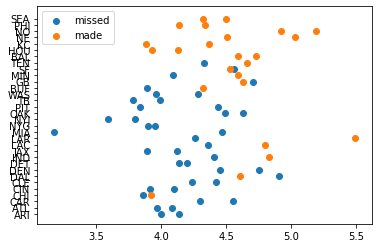

In [9]:
#just another plot with a legend
missed = plt.scatter(fbdf["Run Blocking"][fbdf["Playoffs"] ==0],fbdf[fbdf["Playoffs"]==0]["Team"])
made = plt.scatter(fbdf["Run Blocking"][fbdf["Playoffs"] ==1],fbdf[fbdf["Playoffs"]==1]["Team"])
plt.legend((missed,made),("missed", "made"))

In [10]:
#We see that there is not too much correlation between the variables at first glance except for possibly quarterback
#performance (DVOAQ)

#But now we will go into the statistical analysis using a train test split and a logistic regression to predict 
#playoff outcomes based on team's performance in this area 


In [11]:
X_cols = ['Run Blocking', 'Pass Blocking', 'DEF Run Blocking',
       'DEF Pass Rushing', 'DVOAQ', 'DVOAR']
y_col = ["Playoffs"]
X = fbdf[X_cols]
y = fbdf[y_col]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state = 24)



In [12]:
#or in statsmodels 
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.422784
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.341    
Dependent Variable: Playoffs         AIC:              49.2050  
Date:               2020-01-23 09:10 BIC:              59.9101  
No. Observations:   44               Log-Likelihood:   -18.602  
Df Model:           5                LL-Null:          -28.232  
Df Residuals:       38               LLR p-value:      0.0017198
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Run Blocking      1.4049   0.8890  1.5803 0.1140 -0.3375  3.1472
Pass Blocking     0.1978   0.2742  0.7212 0.4708 -0.3397  0.7352
DEF Run Block

In [13]:
#Here is the output showing the logodds that each of these parameters changes with 
#The p values that are statistically significant for this model are for DEF Run Blocking and DVOAQ which is not really 
#a surprise

#Now we need to try and predict using our test data and then run some analysis based on model as to how well it predicts




In [14]:
lr = LogisticRegression()
logreg1 = lr.fit(X_train,y_train)

y_pred = logreg1.predict(X_test)
print("Accuracy of logistic regression classifier on the test set: {:.2f}".format(logreg1.score(X_test,y_test)))

Accuracy of logistic regression classifier on the test set: 0.80


/Users/joeybuss/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#now to look at the confusion matrix 
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10  1]
 [ 3  6]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [17]:
#This shows pretty good precision and recall, given that the probability of selecting a correct not playoff team 
#is 62.5% 


# Now we need to look at some other possible analysis to run 
Obviously the sample is very small and we need many more samples, but because I have entered the data by hand I don't 
want to add more, this is more of a way to get the framework and then add more data once the analysis is finished 

# Section 2

Now because our data is only somewhat normalized... DVOAQ, DVOAR, are technically related to the average player, but that is average over many seasons, and since each season is self contained we need to normalize all of the team's features  (subtracting by the mean and dividing by standard deviation to get the z-score). And then running the analysis based on standard deviations away from the season mean for each team

In [39]:
#create a vector of the league averages for each year 
# a refresher 
X_cols = ['Run Blocking', 'Pass Blocking', 'DEF Run Blocking',
       'DEF Pass Rushing', 'DVOAQ', 'DVOAR']
y_col = ["Playoffs"]

In [40]:
years = fbdf["Year"].unique()
features = X_cols
features.append(y_col[0])
norm_df = fbdf["Run Blocking"].apply(norm,mean = 5,std = .9)
print(features,len(features))

['Run Blocking', 'Pass Blocking', 'DEF Run Blocking', 'DEF Pass Rushing', 'DVOAQ', 'DVOAR', 'Playoffs'] 7


In [41]:
#Here is what I will do 
#split the master database into subsets for each year, calculate the means then normalize then append all dataframes
fbdf["Pass Blocking"].mean()

7.117187499999998

In [42]:
def norm(number,mean,std): 
    return (number-mean)/std

features_list =[]
for year in years: 
    subsetdf = fbdf[fbdf.loc[:,"Year"]==year]
    for name in features : 
        mean = subsetdf.loc[:,name].mean()
        sd = subsetdf.loc[:,name].std()
        applied = subsetdf.loc[:,name].apply(norm,mean = mean,std = sd)
        features_list.append(applied)
        
    
   
        


In [43]:
# We are going to need to reshape this array because currently it is (12,32) and we need it to be 64,6
#Number of years * 32,number of features. This will out our data into correct order for the dataframe

feat_array = np.asarray(features_list)
print(feat_array.shape) #turn the list into an array
feat_array_t = np.transpose(feat_array)
print(feat_array_t.shape) # transpose the array
reshaped = np.reshape(feat_array_t,(32*len(years),len(features)))
print(reshaped.shape) # now stack the years below each other in increments of 6 (the number of features)
np.round(reshaped,decimals = 3) 

norm_df = pd.DataFrame(reshaped,columns = features)
norm_df.head()



(14, 32)
(32, 14)
(64, 7)


,Run Blocking,Pass Blocking,DEF Run Blocking,DEF Pass Rushing,DVOAQ,DVOAR,Playoffs
0,-0.320718,0.859766,-0.183841,0.085641,-0.364671,2.082145,-0.762398
1,-0.839602,1.006301,-0.101765,1.366394,-2.932606,-1.141788,-0.762398
2,-0.777447,-0.270885,0.072868,-0.993954,0.208371,-1.115446,-0.762398
3,-0.654151,-0.303937,1.680978,-0.395403,0.849853,-0.548076,-0.762398
4,1.264401,-0.647769,-0.397765,-0.080451,1.793975,1.675936,1.270663


In [44]:
# Now just using standard scaler 
#reshaped1 = StandardScaler().fit_transform(reshaped)
#stdscalerresh= pd.DataFrame(reshaped1)
#print(stdscalerresh.head(),norm_df.head())
#These turn out roughly the same

In [45]:
#Because we normalized playoffs we will just take any value above zero as a playoff appearance and below 0 not a playoff
def denorm(x): 
    if x > 0 :
        return 1
    if x<=0:
        return 0

In [46]:
norm_df["Playoffs"] = norm_df["Playoffs"].apply(denorm) 
norm_df.head()

,Run Blocking,Pass Blocking,DEF Run Blocking,DEF Pass Rushing,DVOAQ,DVOAR,Playoffs
0,-0.320718,0.859766,-0.183841,0.085641,-0.364671,2.082145,0
1,-0.839602,1.006301,-0.101765,1.366394,-2.932606,-1.141788,0
2,-0.777447,-0.270885,0.072868,-0.993954,0.208371,-1.115446,0
3,-0.654151,-0.303937,1.680978,-0.395403,0.849853,-0.548076,0
4,1.264401,-0.647769,-0.397765,-0.080451,1.793975,1.675936,1


In [47]:
# we now have a normalized dataset and we can run an analysis where we will interpret the results as if a team is 
#1 standard deviation better, then their odds increase by X 

In [48]:
# This will be the exact same set up as before 
X_cols = []
y_col = []
for name in norm_df.columns :
    if name != "Playoffs":
            X_cols.append(name)
    else :
        y_col.append(name)
print(X_cols,y_col)

    

['Run Blocking', 'Pass Blocking', 'DEF Run Blocking', 'DEF Pass Rushing', 'DVOAQ', 'DVOAR'] ['Playoffs']


In [49]:
#train_test_split 
Xnorm = norm_df[X_cols]
ynorm =  norm_df[y_col]
X_train,X_test, y_train,y_test = train_test_split(Xnorm,ynorm,test_size = .2,random_state = 24)

In [50]:
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.400643
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.383     
Dependent Variable: Playoffs         AIC:              52.8656   
Date:               2020-01-23 09:19 BIC:              64.4565   
No. Observations:   51               Log-Likelihood:   -20.433   
Df Model:           5                LL-Null:          -33.112   
Df Residuals:       45               LLR p-value:      0.00011883
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Run Blocking        1.0850   0.6503  1.6683 0.0953 -0.1897 2.3596
Pass Blocking       0.7523   0.5638  1.3343 0.1821 -0.3528 1.8574


# Interpretation
So we can see these results and there is only one value for which we have statistical significance which is the quarterback value, and not only is it statistically significant, but the magnitude is quite large at 2.01 which is for every standard deviation increase, it results in a 2 point increase in the log odds. Overall our p-values are much lower and this should be due in part to the normalization. 


This is not surprising because we often see the best quarterbacks in the playoffs, and if they aren't the best quarterbacks then it was a one off year in which that quarterback played well above average for that year. 



# Conclusion... For now

We still have more analysis to run, such as creating a more balanced sample using SMOTE to create more minority samples, but because the number of teams that make the playoffs is almost 40% the sample size is not terribly unbalanced, it just means that we cant really use the ROC curve and we just really on the precision,recall,...

If I were to continue this I would like to supply some interaction terms, especially between offensive line play and quarterback play, would need to figure out the inherent endogeneity between them, possibly add in a feature that is average snap to throw time to control for how long the QB holds it, Or possibly how often he holds it longer than x seconds to show offensive line play rather than just sacks. Also much more data is needed to get better quality coefficients. Preferably more than 200 observations AKA 7 seasons

This concludes my first foray into machine Learning

In [54]:
from imblearn import SMOTE

ImportError: cannot import name 'SMOTE' from 'imblearn' (/Users/joeybuss/anaconda3/lib/python3.7/site-packages/imblearn/__init__.py)

In [53]:
!pip install imblearn

In [55]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with current_repodata.json, will retry with next repodata source.
Initial quick solve with frozen env failed.  Unfreezing env and trying again.
Solving environment: failed with current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/joeybuss/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_0         148 KB  conda-forge
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ----------------------